# Agglomerative Hierarchical Clustering Algorithm

## Step 1: Importing all the necessary packages

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

## Step 2: Loading the dataset from csv file

In [7]:
iris_df = pd.read_csv('iris/iris.data')
iris_df.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


## Step 3: Data Preprocessing
As we can see, we need to add column headers to define the feature names and remove the species columns from our dataset.

In [8]:
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris_df = pd.read_csv('iris/iris.data', header=None, names=columns)
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Now we will remove the unnecessary column species

In [9]:
X = iris_df.drop(columns=['species'], errors='ignore')

We will now standardize our data.

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# displaying the scaled data
pd.DataFrame(X_scaled, columns=X.columns)

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


As you can see, each feature is scaled so that its mean is 0 and its standard deviation is 1.

## Step 4: Perform Agglomerative Hierarchical Clustering
We will perform AHC using different linkage methods: single, complete, average, and ward.

In [15]:
linkage_methods = ['single', 'complete', 'average', 'ward']

# dictionary to hold the cluster labels for each method
clusters = {}

for method in linkage_methods:
    ahc = AgglomerativeClustering(n_clusters=3,linkage=method)
    clusters[method] = ahc.fit_predict(X_scaled)

#number of clusters formed for each method
for method, labels in clusters.items():
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    print(f"Number of clusters using {method} linkage: {n_clusters}")

Number of clusters using single linkage: 3
Number of clusters using complete linkage: 3
Number of clusters using average linkage: 3
Number of clusters using ward linkage: 3


## Step 5: Visualize Dendrograms

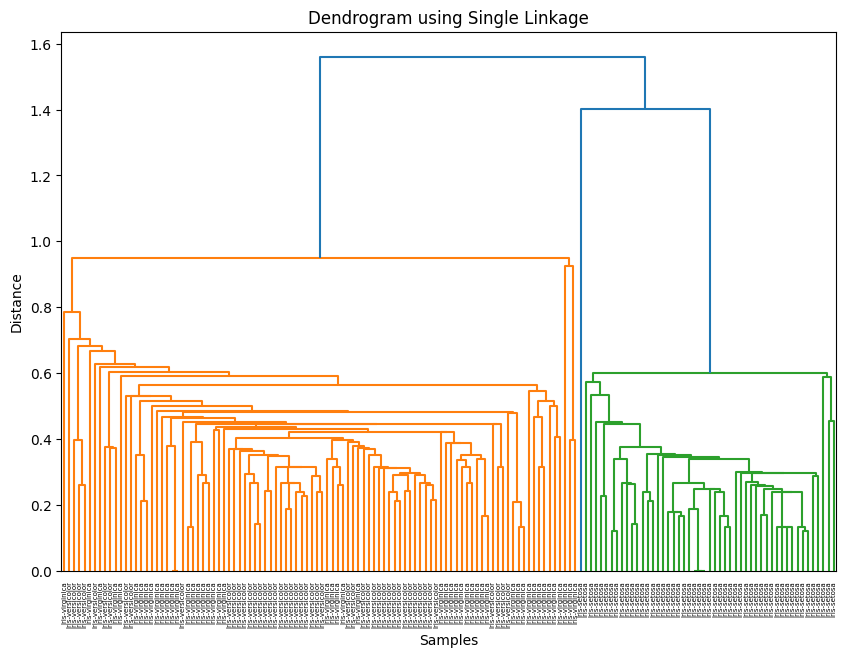

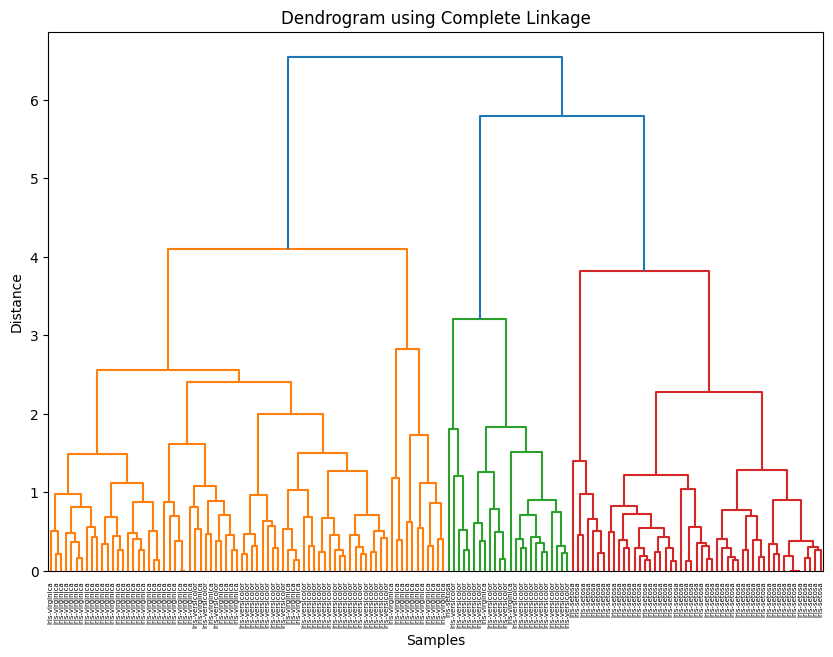

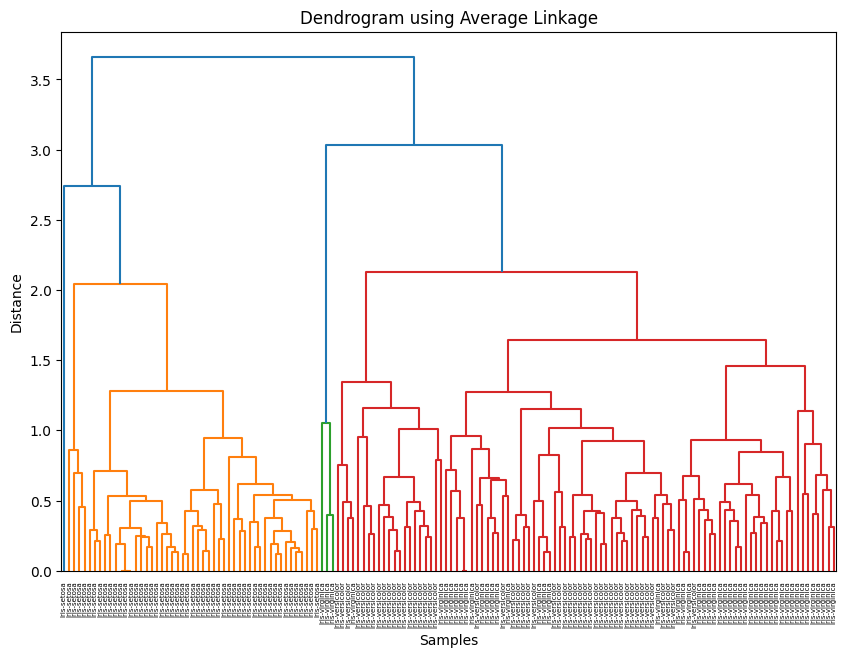

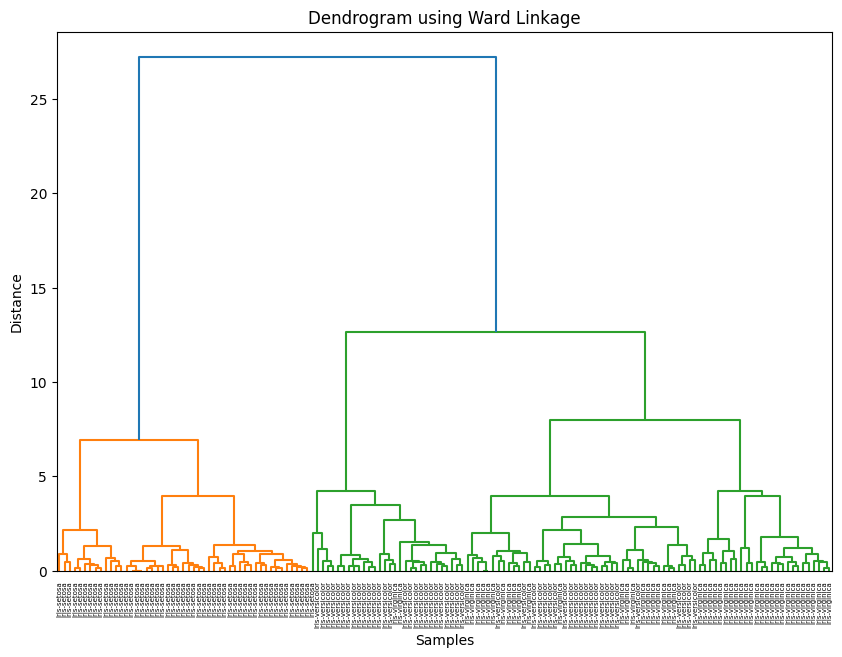

In [16]:
def plot_dendrogram(method):
    # Create linkage matrix
    Z = linkage(X_scaled, method=method)
    
    # Create a dendrogram
    plt.figure(figsize=(10, 7))
    dendrogram(Z, labels=iris_df['species'].values)
    plt.title(f'Dendrogram using {method.capitalize()} Linkage')
    plt.xlabel('Samples')
    plt.ylabel('Distance')
    plt.show()

#dendrograms for each linkage method
for method in linkage_methods:
    plot_dendrogram(method)

## Step 6: Evaluating the Results

In [19]:
for method in linkage_methods:
    iris_df[f'cluster_{method}'] = clusters[method]
    print(f"\nCluster assignments using {method.capitalize()} linkage:")
    print(iris_df[f'cluster_{method}'].value_counts().to_string(index=True))


Cluster assignments using Single linkage:
cluster_single
0    100
2     49
1      1

Cluster assignments using Complete linkage:
cluster_complete
0    77
1    49
2    24

Cluster assignments using Average linkage:
cluster_average
1    97
0    50
2     3

Cluster assignments using Ward linkage:
cluster_ward
0    71
1    49
2    30
